<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Flowers/train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 3474 images belonging to 5 classes.


In [6]:
training_set.class_indices

{'Daisy': 0, 'Lavender': 1, 'Lily': 2, 'Rose': 3, 'Sunflower': 4}

In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)

109/109 [==============================] - 28s 256ms/step - loss: 0.4876 - accuracy: 0.8230
Epoch 6/10
109/109 [==============================] - 28s 260ms/step - loss: 0.4064 - accuracy: 0.8460
Epoch 7/10
109/109 [==============================] - 28s 257ms/step - loss: 0.3603 - accuracy: 0.8661
Epoch 8/10
109/109 [==============================] - 28s 259ms/step - loss: 0.3199 - accuracy: 0.8843
Epoch 9/10
109/109 [==============================] - 28s 255ms/step - loss: 0.2995 - accuracy: 0.8860
Epoch 10/10
109/109 [==============================] - 28s 257ms/step - loss: 0.2626 - accuracy: 0.9044


In [9]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.18994325399398804
Train Accuracy 0.9332181811332703


In [10]:
model.save("/content/drive/MyDrive/Flowers.h5")

In [11]:
model_1=load_model('/content/drive/MyDrive/Flowers.h5')

1/1 [==============================] - 0s 196ms/step
Daisy


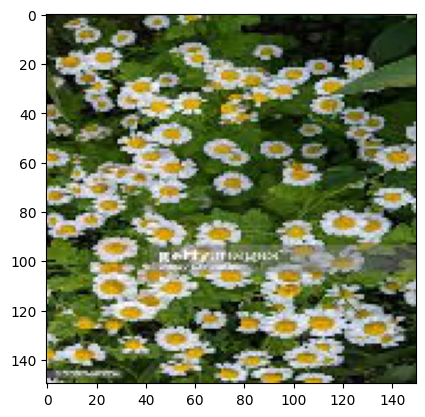

In [12]:
folder='/content/drive/MyDrive/Flowers/test/Daisy/Daisy (200).jpeg'
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 223ms/step
Lavender


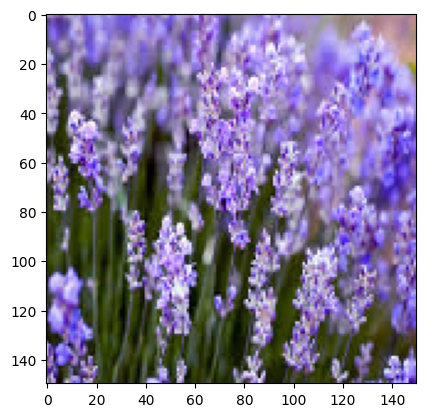

In [15]:
folder='/content/drive/MyDrive/Flowers/test/Lavender/Lavender (10).jpeg'
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 28ms/step
Rose


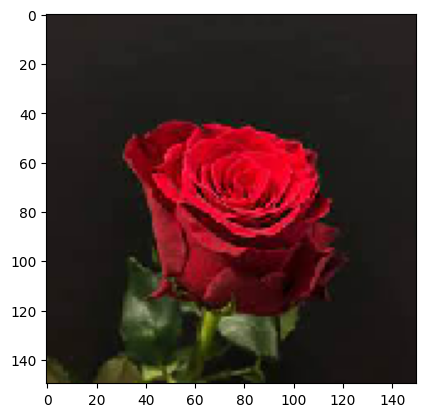

In [16]:
folder='/content/drive/MyDrive/Flowers/test/Rose/rose (1).jpeg'
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']
print(class_name[result])
plt.show()

1/1 [==============================] - 0s 18ms/step
Lily


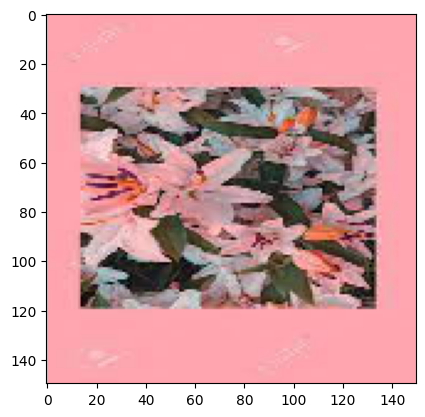

In [18]:
folder='/content/drive/MyDrive/Flowers/test/Lily/Lily (101).jpeg'
img=load_img(folder,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax())
class_name=['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']
print(class_name[result])
plt.show()